<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1:-Downloading-the-data" data-toc-modified-id="Q1:-Downloading-the-data-1">Q1: Downloading the data</a></span><ul class="toc-item"><li><span><a href="#How-many-records-are-in-January-data?" data-toc-modified-id="How-many-records-are-in-January-data?-1.1">How many records are in January data?</a></span></li></ul></li><li><span><a href="#Q2:-Computing-duration?" data-toc-modified-id="Q2:-Computing-duration?-2">Q2: Computing duration?</a></span><ul class="toc-item"><li><span><a href="#What's-the-average-trip-duration-in-January?" data-toc-modified-id="What's-the-average-trip-duration-in-January?-2.1">What's the average trip duration in January?</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2.2">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Extra:-Inconsistent-Datetime-Format" data-toc-modified-id="Extra:-Inconsistent-Datetime-Format-2.2.1">Extra: Inconsistent Datetime Format</a></span></li></ul></li><li><span><a href="#Data-Filtering" data-toc-modified-id="Data-Filtering-2.3">Data Filtering</a></span><ul class="toc-item"><li><span><a href="#Extra-Question:-How-many-records-were-dropped?" data-toc-modified-id="Extra-Question:-How-many-records-were-dropped?-2.3.1">Extra Question: How many records were dropped?</a></span></li></ul></li></ul></li><li><span><a href="#Q3:-Missing-values" data-toc-modified-id="Q3:-Missing-values-3">Q3: Missing values</a></span><ul class="toc-item"><li><span><a href="#What's-the-fractions-of-missing-values-for-the-pickup-location-ID?" data-toc-modified-id="What's-the-fractions-of-missing-values-for-the-pickup-location-ID?-3.1">What's the fractions of missing values for the pickup location ID?</a></span></li></ul></li><li><span><a href="#Q4:-One-hot-encoding" data-toc-modified-id="Q4:-One-hot-encoding-4">Q4: One-hot encoding</a></span><ul class="toc-item"><li><span><a href="#What's-the-dimensionality-of-this-matrix?-(The-number-of-columns)" data-toc-modified-id="What's-the-dimensionality-of-this-matrix?-(The-number-of-columns)-4.1">What's the dimensionality of this matrix? (The number of columns)</a></span></li></ul></li><li><span><a href="#Q5:-Training-a-model" data-toc-modified-id="Q5:-Training-a-model-5">Q5: Training a model</a></span><ul class="toc-item"><li><span><a href="#What's-the-RMSE-on-train?" data-toc-modified-id="What's-the-RMSE-on-train?-5.1">What's the RMSE on train?</a></span></li></ul></li><li><span><a href="#Q6:-Evaluating-the-model" data-toc-modified-id="Q6:-Evaluating-the-model-6">Q6: Evaluating the model</a></span><ul class="toc-item"><li><span><a href="#What's-the-RMSE-on-validation?" data-toc-modified-id="What's-the-RMSE-on-validation?-6.1">What's the RMSE on validation?</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

# Performance
from sklearn.metrics import mean_squared_error

## Q1: Downloading the data

- NYC taxi dataset - "High Volume For-Hire Vehicle Trip Records"
- Download the data for January and February 2021.

In [2]:
jan_filename = 'fhv_tripdata_2021-01.parquet'
feb_filename = 'fhv_tripdata_2021-02.parquet'

In [3]:
df_jan = pd.read_parquet(os.path.join('data', jan_filename))

In [4]:
df_jan.head(2)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009


### How many records are in January data?

In [5]:
A1 = df_jan.shape[0]

In [6]:
print(f'Answer: {A1}')

Answer: 1154112


## Q2: Computing duration?

In [7]:
def create_target(df):
    df = df.copy()
    
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60
    return df

In [8]:
df_jan = create_target(df_jan)

In [9]:
df_jan.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

### What's the average trip duration in January?

In [10]:
A2 = round(df_jan.duration.mean(), 4)

In [11]:
print(f'Answer: {A2}')

Answer: 19.1672


### Data Preparation

/home/fdelca/.virtualenvs/mlcourse01/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


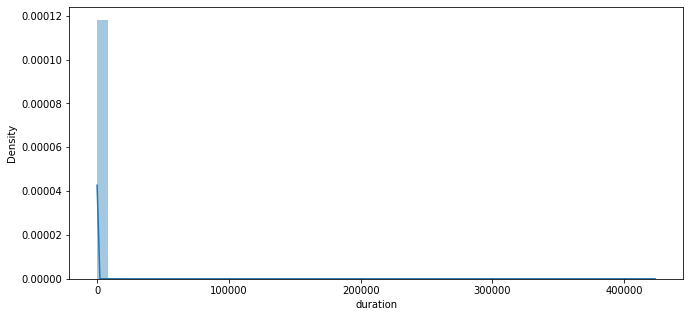

In [12]:
fig = plt.figure(figsize=(11,5))
sns.distplot(df_jan.duration);

In [13]:
df_jan.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

#### Extra: Inconsistent Datetime Format

In [14]:
print(f'Maximum value corresponds to a trip of {(round(df_jan.duration.max() / 60 / 24, 2))} days')

Maximum value corresponds to a trip of 294.01 days


It as **extreme outliers** making the distribution plot extremely skewed. The maximum value does not make any sense since it has **294 days** of duration.

In [15]:
df_jan[df_jan.duration == df_jan.duration.max()]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
345570,B03055,2021-01-11 05:52:43,2021-11-01 06:03:46,NaN,55.0,None,B03055,423371.05


This extreme value is due to a **datetime format** problem -> where the month and day are switched. To solve this problem one must look at this extreme cases, and set a datetime format to every datetime column.

In [16]:
pd.to_datetime('2021-01-11 06:03:46') - pd.to_datetime('2021-01-11 05:52:43')

Timedelta('0 days 00:11:03')

The trip was suppose to last for 11 minutes.

### Data Filtering

In [17]:
orig_records = df_jan.shape[0]
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)].copy()

#### Extra Question: How many records were dropped?

In [18]:
rows_drop = orig_records - df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)].shape[0]

In [19]:
print(f'Answer: {rows_drop}')

Answer: 44286


## Q3: Missing values

In [20]:
df_jan[df_jan.PUlocationID == -1]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration


### What's the fractions of missing values for the pickup location ID?

In [21]:
A3 = round(df_jan['PUlocationID'].isnull().sum() / df_jan.shape[0]* 100, 2)

In [22]:
print(f'Answer: {A3} %')

Answer: 83.53 %


In [23]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)

## Q4: One-hot encoding

In [24]:
categorical = ['PUlocationID', 'DOlocationID']

# Transform to string
df_jan[categorical] = df_jan[categorical].astype(str)

# Transform into dictionary of records
train_dicts = df_jan[categorical].to_dict(orient='records')

# Apply Dictvectorizer
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [25]:
X_train.shape

(1109826, 525)

### What's the dimensionality of this matrix? (The number of columns)

In [26]:
A4 = len(dv.get_feature_names_out())

In [27]:
print(f'Answer: {A4} columns')

Answer: 525 columns


## Q5: Training a model

In [28]:
target = 'duration'
y_train = df_jan[target].values

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### What's the RMSE on train?

In [30]:
y_pred_train = lr.predict(X_train)

A5 = round(mean_squared_error(y_train, y_pred_train, squared=False), 4)
print(f'Answer: {A5} RMSE on train')

Answer: 10.5285 RMSE on train


## Q6: Evaluating the model

In [31]:
df_feb = pd.read_parquet(os.path.join('data', feb_filename))

df_feb = create_target(df_feb)

df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)].copy()

df_feb['PUlocationID'] = df_feb['PUlocationID'].fillna(-1)


categorical = ['PUlocationID', 'DOlocationID']

# Transform to string
df_feb[categorical] = df_feb[categorical].astype(str)

# Transform into dictionary of records
val_dicts = df_feb[categorical].to_dict(orient='records')

# Apply Dictvectorizer
X_val = dv.transform(val_dicts)

### What's the RMSE on validation?

In [32]:
y_val = df_feb[target].values
y_pred_val = lr.predict(X_val)

A5 = round(mean_squared_error(y_val, y_pred_val, squared=False), 4)
print(f'Answer: {A5} RMSE on validation')

Answer: 11.0143 RMSE on validation


---

In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))